In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import re
from collections import defaultdict
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

In [2]:
# READ-IN CLEAN ARC DATAFRAME
filename = 'data/MEBL3/MEBL3_All_Arc_Counts_Clean'
arc_count_df = pd.read_csv(filename, parse_dates=['Time'])    
print(f"{filename} : file read into a pandas dataframe.")

data/MEBL3/MEBL3_All_Arc_Counts_Clean : file read into a pandas dataframe.


In [3]:
arc_count_df

,Time,B2 Beam Blanker,B2 Bias,B2 Extractor,B2 Filament,B2 Gun Lens,B2 Main Lens,B2 Suppressor,B3 Beam Blanker,B3 Bias,...,D3 Gun Lens,D3 Main Lens,D3 Suppressor,D4 Beam Blanker,D4 Bias,D4 Extractor,D4 Filament,D4 Gun Lens,D4 Main Lens,D4 Suppressor
0,2024-06-14 01:55:12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-06-14 01:55:13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-06-14 01:55:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-06-14 01:55:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-06-14 01:55:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060403,2024-06-27 23:59:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1060404,2024-06-27 23:59:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1060405,2024-06-27 23:59:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1060406,2024-06-27 23:59:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# GET TIMESTAMPS OF ALL ARC EVENTS ID'D BY SYSTEM COLUMN THEN COMPONENT
arc_events = defaultdict(lambda: defaultdict(list))
for col in arc_count_df.columns[1:]:
    system_column, column_component = col[:2], col[3:]
    #print(f"{system_column}|{column_component}")
    arcs = arc_count_df[['Time',col]]
    arc_times = list(arcs[arcs[col] >= 1.0]['Time'])
    #print(arc_times)
    arc_events[system_column][column_component] += arc_times
arc_events

defaultdict(<function __main__.<lambda>()>,
            {'B2': defaultdict(list,
                         {'Beam Blanker': [],
                          'Bias': [Timestamp('2024-06-26 13:56:55'),
                           Timestamp('2024-06-27 17:42:32')],
                          'Extractor': [Timestamp('2024-06-14 16:39:46'),
                           Timestamp('2024-06-14 22:51:35'),
                           Timestamp('2024-06-15 03:36:46'),
                           Timestamp('2024-06-16 20:54:55'),
                           Timestamp('2024-06-17 00:14:29'),
                           Timestamp('2024-06-17 22:06:23'),
                           Timestamp('2024-06-18 01:36:54'),
                           Timestamp('2024-06-19 00:19:29'),
                           Timestamp('2024-06-19 01:14:54'),
                           Timestamp('2024-06-22 04:03:19'),
                           Timestamp('2024-06-23 06:34:54'),
                           Timestamp('2024-06-23 06:35:06'

In [5]:
counts_dict = defaultdict(lambda: defaultdict(list))
for col in arc_count_df.columns[1:]:
    #print(f"{col[:2]},{col[3:]}")
    #print(arc_events[col[:2]][col[3:]])
    counts_dict[col] = len(arc_events[col[:2]][col[3:]])
counts_dict

defaultdict(<function __main__.<lambda>()>,
            {'B2 Beam Blanker': 0,
             'B2 Bias': 2,
             'B2 Extractor': 21,
             'B2 Filament': 0,
             'B2 Gun Lens': 15,
             'B2 Main Lens': 0,
             'B2 Suppressor': 15,
             'B3 Beam Blanker': 0,
             'B3 Bias': 3,
             'B3 Extractor': 7,
             'B3 Filament': 0,
             'B3 Gun Lens': 4,
             'B3 Main Lens': 1,
             'B3 Suppressor': 2,
             'B4 Beam Blanker': 0,
             'B4 Bias': 24,
             'B4 Extractor': 5,
             'B4 Filament': 0,
             'B4 Gun Lens': 16,
             'B4 Main Lens': 0,
             'B4 Suppressor': 3,
             'C2 Beam Blanker': 0,
             'C2 Bias': 5,
             'C2 Extractor': 7,
             'C2 Filament': 0,
             'C2 Gun Lens': 6,
             'C2 Main Lens': 1,
             'C2 Suppressor': 1,
             'C3 Beam Blanker': 1,
             'C3 Bias': 20,
    

In [8]:
sorted_counts = {k: v for k, v in (sorted(((k, v) for k, v in counts_dict.items() if v != 0), key=lambda item: (item[1], item[0]), reverse=True))}

/var/folders/f5/gym8h1y12335l6bzxp5c9pgw0000gn/T/ipykernel_26291/1782311272.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(data = sorted_counts, x = sorted_counts.values(), y = sorted_counts.keys(), fill = True, palette = palette)
/var/folders/f5/gym8h1y12335l6bzxp5c9pgw0000gn/T/ipykernel_26291/1782311272.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_yticklabels(plot.get_yticklabels())


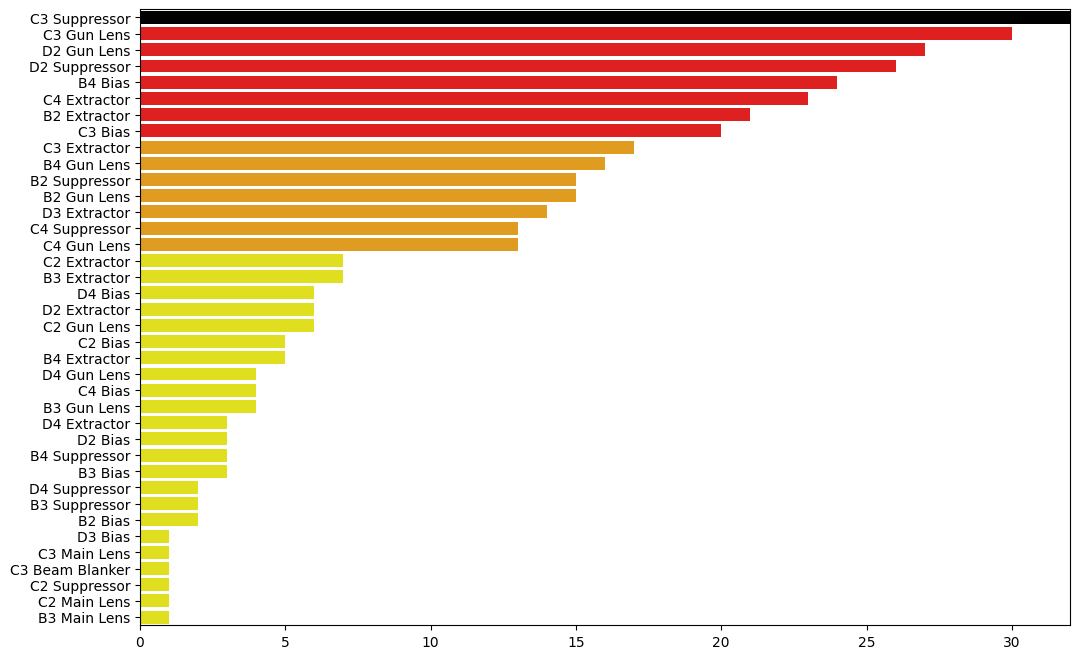

In [9]:
# PLOT ARC COUNTS BY COLUMN COMPONENT
plt.figure(figsize=(12,8))
palette = [
    'yellow' if value < 8 
    else 'orange' if 8 <= value < 18 
    else 'red' if value < 32
    else 'black'
    for key, value in sorted_counts.items()
]
plot = sns.barplot(data = sorted_counts, x = sorted_counts.values(), y = sorted_counts.keys(), fill = True, palette = palette)
plot.set_yticklabels(plot.get_yticklabels())
plot.set_xlim(0,32)
plt.show()

### *Noticing slight within-system correlations between Gun Lens and Suppressor components

In [10]:
counts_df = pd.DataFrame(list(counts_dict.items()), columns=['Column HVPS', 'Arc Count'])
counts_df["Column"] = counts_df['Column HVPS'].str[:2]
counts_df["HVPS"] = counts_df['Column HVPS'].str[3:]
counts_df = counts_df[["Column", "HVPS", "Arc Count"]]
counts_df

,Column,HVPS,Arc Count
0,B2,Beam Blanker,0
1,B2,Bias,2
2,B2,Extractor,21
3,B2,Filament,0
4,B2,Gun Lens,15
...,...,...,...
58,D4,Extractor,3
59,D4,Filament,0
60,D4,Gun Lens,4
61,D4,Main Lens,0


### This point onwards is poorly written code to attempt the same functionality as pressure_spikes.ipynb and window_pressure.ipynb

In [12]:
filename = 'data/MEBL3/MEBL3_Pressure-data-2024-06-28 09_40_08.csv'
pressure_df = pd.read_csv(filename, parse_dates=['Time'])   

In [ ]:
# FIND TIMESTAMPS OF PRESSURE SPIKES, MEANING 2X RISE IN PRESSURE
def pressure_spike(arc_event_times, pressure_df):
    pressure_spikes = defaultdict(lambda: defaultdict(list))
    threshold_constant = 2

    if arc_event_times == []:
        return pressure_spikes

    pressure_arc_df = pressure_df.copy()
    pressure_arc_df = pressure_arc_df[pressure_arc_df["Time"].isin(arc_event_times)]
    
    chamber_threshold = stat.median(list(pressure_df["Chamber Pressure"])) * threshold_constant
    column_threshold = stat.median(list(pressure_df["Column Pressure"])) * threshold_constant
    for col in pressure_arc_df.columns[1:]:
        pressure_type = col.split(" ")[0]
        spikes = pressure_arc_df[['Time',col]]
        if pressure_type == "Chamber":
            spike_times = list((spikes[spikes[col] >= chamber_threshold]['Time']).astype(str))
        if pressure_type == "Column":
            spike_times = list((spikes[spikes[col] >= column_threshold]['Time']).astype(str))
        pressure_spikes[pressure_type] = spike_times
    return pressure_spikes

In [ ]:
# % arcs with pressure events, categorized as 2x increase
arc_spike_counts = []
for i in ["B", "C", "D"]:
    for j in ["2", "3", "4"]:
        for k in ["Beam Blanker", "Bias", "Extractor", "Filament", "Gun Lens", "Main Lens", "Suppressor"]:
            column = i + j
            hvps = k
            arcs = arc_events[column][hvps]
            pressure_spikes_df = pressure_spike(arcs, pressure_df)

            print(f"{column} {hvps}")
            if not pressure_spikes_df["Column"]:
                print(f"{'':>10}no column")
                arc_column_spikes_count = 0
            else:
                column_list = pressure_spikes_df['Column']
                print(f"{'':>10}column: {column_list}")
                arc_column_spikes_count = len(column_list)
                print(f"{'':>10}count: {arc_column_spikes_count}")
            if not pressure_spikes_df["Chamber"]:
                print(f"{'':>10}no chamber")
                arc_chamber_spikes_count = 0
            else:
                chamber_list = pressure_spikes_df['Chamber']
                print(f"{'':>10}chamber: {chamber_list}")
                arc_chamber_spikes_count = len(chamber_list)
                print(f"{'':>10}count: {arc_chamber_spikes_count}")

            arcs_spikes_count = arc_column_spikes_count + arc_chamber_spikes_count
            print(f"{'':>10}{arcs_spikes_count=}")

            arc_spike_counts.append(arcs_spikes_count)
print(len(arc_spike_counts))

B2 Beam Blanker
          no column
          no chamber
          arcs_spikes_count=0
B2 Bias
          no column
          no chamber
          arcs_spikes_count=0
B2 Extractor
          column: ['2024-06-23 06:34:54', '2024-06-23 06:35:06', '2024-06-23 06:35:31', '2024-06-23 07:06:12']
          count: 4
          no chamber
          arcs_spikes_count=4
B2 Filament
          no column
          no chamber
          arcs_spikes_count=0
B2 Gun Lens
          column: ['2024-06-17 07:03:28', '2024-06-23 06:35:31']
          count: 2
          no chamber
          arcs_spikes_count=2
B2 Main Lens
          no column
          no chamber
          arcs_spikes_count=0
B2 Suppressor
          column: ['2024-06-23 06:35:06']
          count: 1
          no chamber
          arcs_spikes_count=1
B3 Beam Blanker
          no column
          no chamber
          arcs_spikes_count=0
B3 Bias
          column: ['2024-06-23 06:35:31']
          count: 1
          no chamber
          arcs_spikes_c

In [ ]:
counts_df["Arc with Pressure Spike Count"] = arc_spike_counts
counts_df

,Column,HVPS,Arc Count,Arc with Pressure Spike Count
0,B2,Beam Blanker,0,0
1,B2,Bias,2,0
2,B2,Extractor,21,4
3,B2,Filament,0,0
4,B2,Gun Lens,15,2
...,...,...,...,...
58,D4,Extractor,3,0
59,D4,Filament,0,0
60,D4,Gun Lens,4,0
61,D4,Main Lens,0,0


In [ ]:
counts_df["% Arcs with Pressure Spike"] = 100*counts_df["Arc with Pressure Spike Count"]/counts_df["Arc Count"]
counts_df

,Column,HVPS,Arc Count,Arc with Pressure Spike Count,% Arcs with Pressure Spike
0,B2,Beam Blanker,0,0,NaN
1,B2,Bias,2,0,0.000000
2,B2,Extractor,21,4,19.047619
3,B2,Filament,0,0,NaN
4,B2,Gun Lens,15,2,13.333333
...,...,...,...,...,...
58,D4,Extractor,3,0,0.000000
59,D4,Filament,0,0,NaN
60,D4,Gun Lens,4,0,0.000000
61,D4,Main Lens,0,0,NaN


In [ ]:
counts_df.to_csv('arcs_with_pressure_spike_by_columns_hvps', index = False)

In [ ]:
pd.set_option('display.max_rows', 63)

In [ ]:
plot_df = counts_df.copy()
plot_df["Column HVPS"] = plot_df["Column"] + " " + plot_df["HVPS"]
column_order = ["Column HVPS", "% Arcs with Pressure Spike"]
plot_df = plot_df[column_order].sort_values(by='% Arcs with Pressure Spike', ascending=False)
plot_df = plot_df.dropna(axis=0)
plot_df

/var/folders/f5/gym8h1y12335l6bzxp5c9pgw0000gn/T/ipykernel_20471/1864453016.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(data = plot_df, x = '% Arcs with Pressure Spike', y = "Column HVPS", fill = True, palette = palette)
/var/folders/f5/gym8h1y12335l6bzxp5c9pgw0000gn/T/ipykernel_20471/1864453016.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_yticklabels(plot.get_yticklabels())


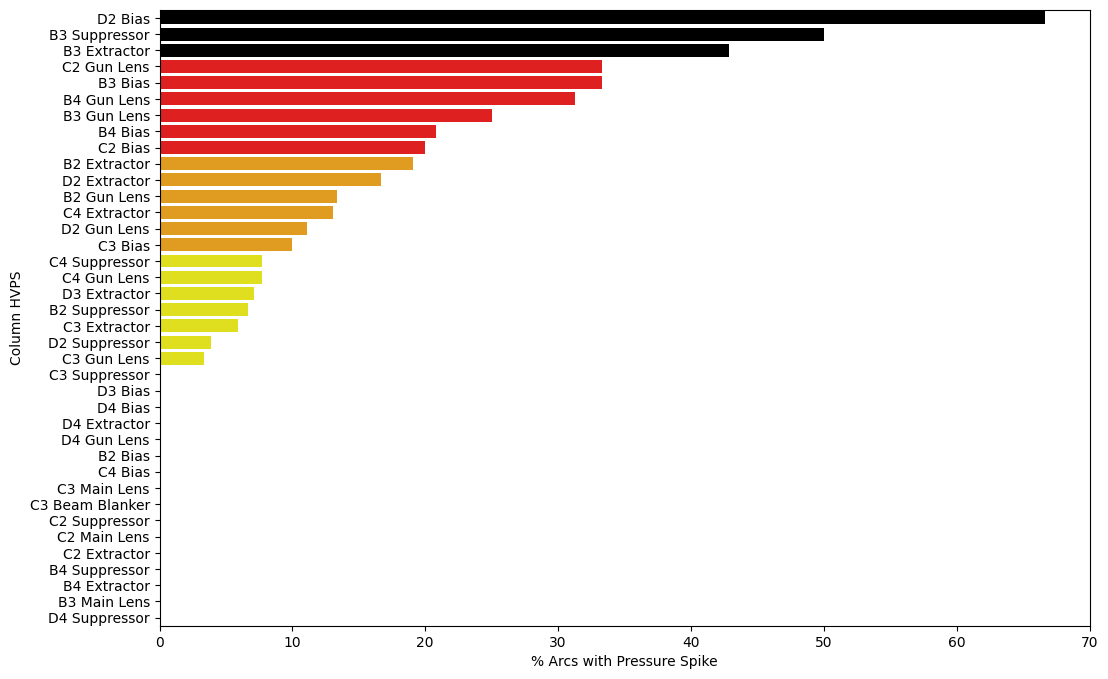

In [ ]:
# PLOT 
plt.figure(figsize=(12,8))
palette = [
    'yellow' if x < 10 
    else 'orange' if 10 <= x < 20
    else 'red' if x < 40
    else 'black'
    for x in plot_df["% Arcs with Pressure Spike"]
]
plot = sns.barplot(data = plot_df, x = '% Arcs with Pressure Spike', y = "Column HVPS", fill = True, palette = palette)
plot.set_yticklabels(plot.get_yticklabels())
#plot.set_xlim(0,32)
plt.show()